# Analysis-Main Observations
The data analysis of the Pymaceuticals, Inc. treatments for squamous cell carcinoma (scc) in 249 mice focused on the tumor volume observed for four treatments over the course of a maximum of 45 days. The main drug of interest, Capomulin, showed positivie results in reducing the scc tumor volume over time for both female and male mice. Here are three main observations from this analysis:
1. The median tumor volume (mm3) for mice treated with Capomulin and Ramicane were about 10mm3 less than all the other drug treatments, additionally these two drugs were administered to more mice than the other eight drug treatments. The main focus for this analysis was the treatment Capomulin, however further analysis of the correlation between weight and tumor volume, as well as tumor volume progression throughout timepoints for the other drugs should be investigated. 

2. The study has an almost 50/50 split of sex of the study subjects, which gives us a good indicator of how the Capomulin treatment works on each sex. To understand how Capomulin treated scc tumor volume in both a male and a female mouse, a line graph was created to document the tumor volume from the first to last timepoints(days). The male and female subject chosen were around the same age, however the male mouse weighed 4g less than the female. The tumor volume in the female mouse fluctuated up and down from timepoint 5 to 25, then drastically declined after day 25. The male, however, had a steady decline in tumor volume at each timepoint. The male did have a slight uptick at 40 days, but the tumor volume again declined after that timepoint. 

3. This data analysis showed there is a positive correlation between weight and tumor volume for the drug treatment Capomulin. The correlation is 0.83, which indicates that when the weight increases so will the tumor volume (this is also slightly observed from the male/female brief analysis). This correlation indicates more research is needed to understand how Capomulin can help lower tumor volume in subjects of higher weight.

In [2]:
# Dependencies and set up
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)



In [3]:
mouse_metadata.columns

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'], dtype='object')

In [4]:
study_results.columns


Index(['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'], dtype='object')

In [5]:
mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [6]:
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [7]:
# combine data into single dataframe
mousestudy_merge=pd.merge(study_results, mouse_metadata, on='Mouse ID')
mousestudy_merge

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [8]:
len(mousestudy_merge['Mouse ID'].unique())
# Mice_Amount=len(subjects)
# Mice_Amount

249

In [9]:
Dup=mousestudy_merge.loc[mousestudy_merge.duplicated(subset=['Mouse ID','Timepoint']),'Mouse ID'].unique()
Dup

array(['g989'], dtype=object)

In [10]:
# Show all the data for the duplicated id
Duplicate_MiceID=mousestudy_merge.loc[mousestudy_merge['Mouse ID']=='g989',:]
Duplicate_MiceID

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [14]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
Clean_MouseStudy= mousestudy_merge[mousestudy_merge['Mouse ID'].isin(Dup) == False]
Clean_MouseStudy

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [15]:
# Check number of mice in clean dataframe
mice_clean=Clean_MouseStudy['Mouse ID'].value_counts()
mice_clean

Mouse ID
b128    10
q787    10
c559    10
s337    10
q511    10
        ..
n482     1
t573     1
f932     1
o848     1
x336     1
Name: count, Length: 248, dtype: int64

# Summary Statistics

In [16]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

DR_mean=Clean_MouseStudy.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
DR_median=Clean_MouseStudy.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
DR_variance=Clean_MouseStudy.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
DR_std=Clean_MouseStudy.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
DR_sem=Clean_MouseStudy.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

Drug_Summary_Table=pd.DataFrame({'Mean Tumor Volume':DR_mean, 'Median Tumor Volume': DR_median, 'Variance Tumor Volume':DR_variance,
                                'Std Deviation Tumor Volume':DR_std, 'Std Error Mean Tumor Volume':DR_sem})
Drug_Summary_Table

,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Std Deviation Tumor Volume,Std Error Mean Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [45]:

# Using the aggregation method, produce the same summary statistics in a single line
Agg_Drug_Sum= Clean_MouseStudy.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
Agg_Drug_Sum

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

# Bar and Pie Charts

In [19]:
# Bar plot of total number of rows(Mouse ID/Timepoints) for each drug regimen
f1=Clean_MouseStudy.groupby('Drug Regimen')['Mouse ID'].count().sort_values(ascending=False)
f1

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Ceftamin     178
Infubinol    178
Propriva     148
Name: Mouse ID, dtype: int64

Text(0, 0.5, '# of Observed Mouse Timepoints')

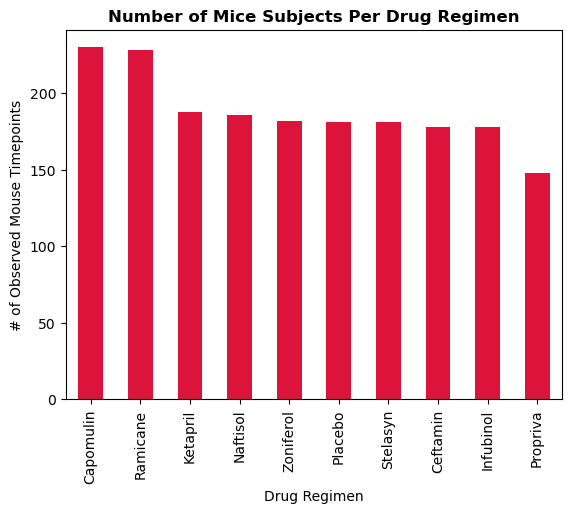

In [20]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
Drug_per_Mouse=f1.plot(kind='bar', color='crimson')
Drug_per_Mouse.set_title(label='Number of Mice Subjects Per Drug Regimen', fontweight='bold')
Drug_per_Mouse.set_ylabel('# of Observed Mouse Timepoints')

In [21]:
# set x axis for bar chart using pyplot
x_axis=np.arange(len(f1))
x_axis

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [22]:
# set y axis for bar chart using pyplot
y_axis=f1
y_axis

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Ceftamin     178
Infubinol    178
Propriva     148
Name: Mouse ID, dtype: int64

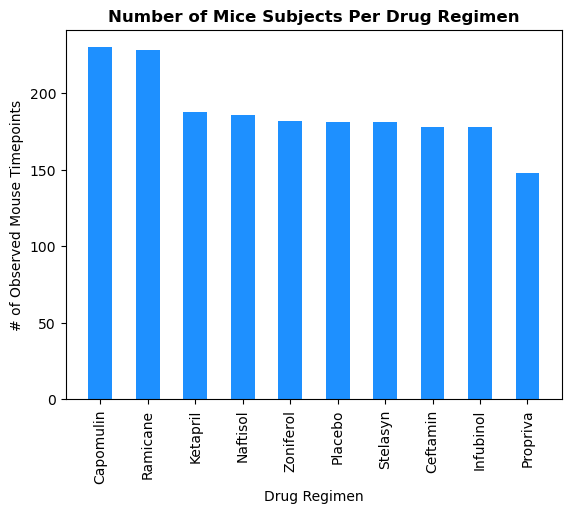

In [23]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(x_axis,y_axis, color='dodgerblue', width=0.5)
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Capomulin", "Ramicane", "Ketapril", "Naftisol", "Zoniferol", "Placebo", "Stelasyn", "Ceftamin",
                            "Infubinol", "Propriva"], rotation="vertical")
plt.title("Number of Mice Subjects Per Drug Regimen", fontweight='bold')
plt.xlabel("Drug Regimen")
plt.ylabel('# of Observed Mouse Timepoints')
plt.show()

In [24]:
# groupby sex data for pie charts
Mice_sex=Clean_MouseStudy.groupby('Sex')['Sex'].count()
Mice_sex

Sex
Female    922
Male      958
Name: Sex, dtype: int64

In [25]:
Mice_sex.index

Index(['Female', 'Male'], dtype='object', name='Sex')

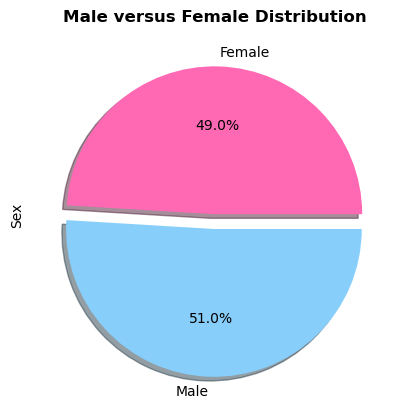

In [26]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
colors=["hotpink", "lightskyblue"]
labels=Mice_sex.index
explode=(0,0.1)
plt.pie(Mice_sex, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True)
plt.title("Male versus Female Distribution", fontweight='bold')
plt.ylabel("Sex")
plt.show()


Text(0.5, 1.0, 'Male versus Female Distribution')

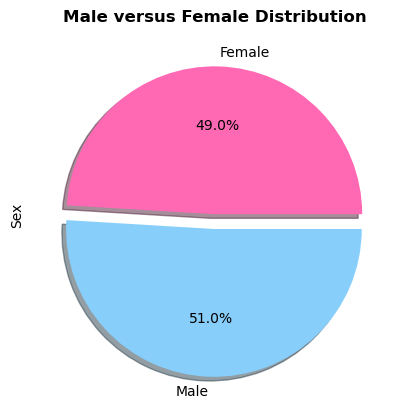

In [27]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
f2=Mice_sex.plot(kind="pie", autopct="%1.1f%%", colors=colors, explode=explode, shadow=True)
f2.set_title(label="Male versus Female Distribution", fontweight='bold')


# Quartiles, Outliers, and Boxplots

In [28]:
# getting last timepoint data for each mouse
Max_TP=Clean_MouseStudy.groupby(['Mouse ID'])['Timepoint'].max().reset_index()
Max_TP 

,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30
...,...,...
243,z435,10
244,z578,45
245,z581,45
246,z795,45


In [29]:
Last_TP_TV=Max_TP.merge(Clean_MouseStudy, on=['Mouse ID', 'Timepoint'], how='left')

Last_TP_TV=Last_TP_TV.rename(columns={'Timepoint': 'Max Timepoint'})
Last_TP_TV.head()

,Mouse ID,Max Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [30]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset   
    # Determine outliers using upper and lower bounds
Drugs=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
Treatment_TV=[]
for drug in Drugs:
    Final_Volume=Last_TP_TV.loc[Last_TP_TV['Drug Regimen']==drug, 'Tumor Volume (mm3)']
    Treatment_TV.append(Final_Volume)
    quartiles=Final_Volume.quantile([.25,.5,.75])
    lowerq=quartiles[0.25]
    upperq=quartiles[0.75]
    iqr=upperq-lowerq
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr) 
    
    Drug_outliers=Final_Volume.loc[(Final_Volume< lower_bound)| (Final_Volume > upper_bound)]
    print(f"{drug}'s potential outliers: {Drug_outliers}")
    
    
    

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


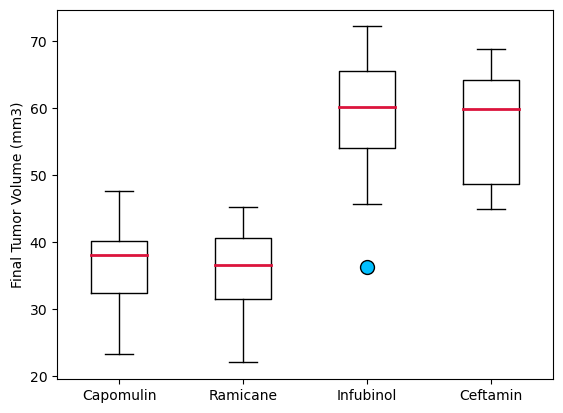

In [33]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
flierprops=dict(markerfacecolor='deepskyblue', markeredgecolor='black', markersize=10)
medianprops=dict(color='crimson', linewidth=2)
plt.boxplot(Treatment_TV, labels=Drugs,flierprops=flierprops, medianprops=medianprops)
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()


In [34]:
# Look at all the data for the drug of interest
Capo_TV=Clean_MouseStudy.loc[Clean_MouseStudy['Drug Regimen']=='Capomulin',:]
Capo_TV

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [35]:
# monitoring volume amount in female mouse

j246_data=Capo_TV.loc[Capo_TV['Mouse ID']=='j246']
j246_data
                                                       

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
1673,j246,0,45.000000,0,Capomulin,Female,21,21
1674,j246,5,45.641438,0,Capomulin,Female,21,21
1675,j246,10,46.408361,0,Capomulin,Female,21,21
1676,j246,15,43.312654,0,Capomulin,Female,21,21
1677,j246,20,44.020370,0,Capomulin,Female,21,21
1678,j246,25,44.555226,0,Capomulin,Female,21,21
1679,j246,30,38.044082,1,Capomulin,Female,21,21
1680,j246,35,38.753265,1,Capomulin,Female,21,21


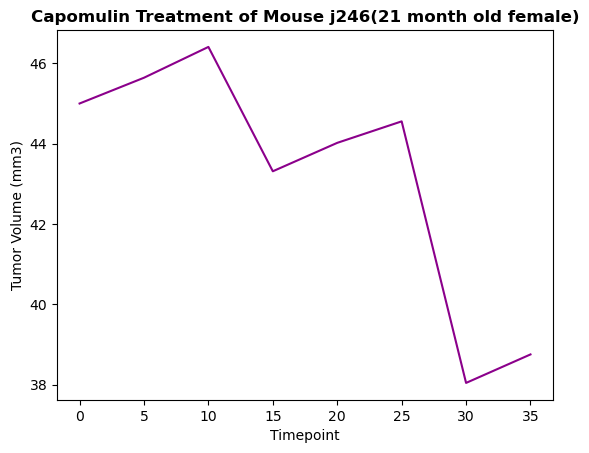

In [36]:
# line plot for female mouse to see how treatment's results on tumor volume
plt.plot(j246_data['Timepoint'],j246_data['Tumor Volume (mm3)'], color='darkmagenta')
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title('Capomulin Treatment of Mouse j246(21 month old female)', fontweight='bold')
plt.show()

In [42]:
# monitoring volume amount in male mouse
m601_data=Capo_TV.loc[Capo_TV['Mouse ID']=='m601']
m601_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
1883,m601,0,45.000000,0,Capomulin,Male,22,17
1884,m601,5,41.408591,1,Capomulin,Male,22,17
1885,m601,10,36.825367,1,Capomulin,Male,22,17
1886,m601,15,35.464612,1,Capomulin,Male,22,17
1887,m601,20,34.255732,1,Capomulin,Male,22,17
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17
1892,m601,45,28.430964,1,Capomulin,Male,22,17


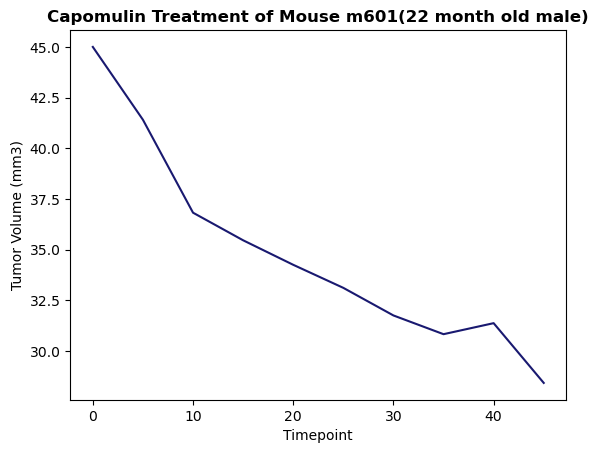

In [43]:
# line plot for female mouse to see how treatment's results on tumor volume
plt.plot(m601_data['Timepoint'],m601_data['Tumor Volume (mm3)'], color='midnightblue')
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title('Capomulin Treatment of Mouse m601(22 month old male)', fontweight='bold')
plt.show()

In [37]:
# Get average tumor volume for Capolumin treated mice
X=Capo_TV.groupby('Mouse ID')["Tumor Volume (mm3)"].mean().reset_index()
X=X.rename(columns={'Tumor Volume (mm3)': 'Average Tumor Volume (mm3)'})
X

,Mouse ID,Average Tumor Volume (mm3)
0,b128,41.963636
1,b742,40.083699
2,f966,36.505973
3,g288,41.990097
4,g316,44.613344
5,i557,44.805810
6,i738,39.141053
7,j119,44.465236
8,j246,43.216925
9,l509,44.434474


In [38]:
Capo_Weight=X.merge(Capo_TV, on=['Mouse ID'])
Capo_Weight

,Mouse ID,Average Tumor Volume (mm3),Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,41.963636,0,45.000000,0,Capomulin,Female,9,22
1,b128,41.963636,5,45.651331,0,Capomulin,Female,9,22
2,b128,41.963636,10,43.270852,0,Capomulin,Female,9,22
3,b128,41.963636,15,43.784893,0,Capomulin,Female,9,22
4,b128,41.963636,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...,...
225,y793,38.506829,25,38.992734,2,Capomulin,Male,17,17
226,y793,38.506829,30,35.726023,2,Capomulin,Male,17,17
227,y793,38.506829,35,36.327870,2,Capomulin,Male,17,17
228,y793,38.506829,40,31.475411,2,Capomulin,Male,17,17


In [44]:
#  plt.scatter(Capo_Weight['Weight (g)'], Capo_Weight['Average Tumor Volume (mm3)'])

The correlation between both factors is 0.83


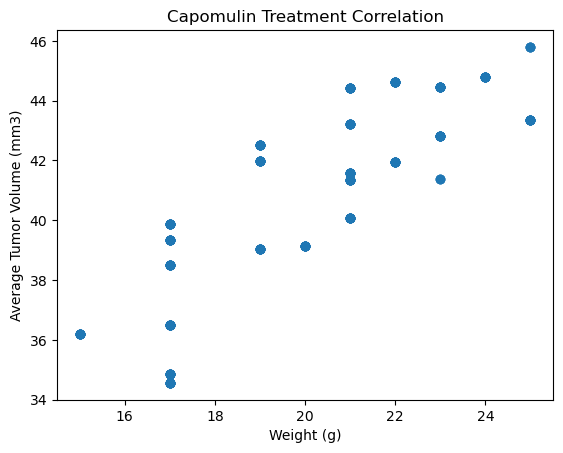

In [40]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
weight_c=Capo_Weight.iloc[:,8]
avt_c=Capo_Weight.iloc[:,1]
plt.scatter(weight_c,avt_c)
plt.title("Capomulin Treatment Correlation")
plt.xlabel('Weight (g)')
plt.ylabel("Average Tumor Volume (mm3)")
correlation=st.pearsonr(avt_c,weight_c)
print(f"The correlation between both factors is {round(correlation[0],2)}")

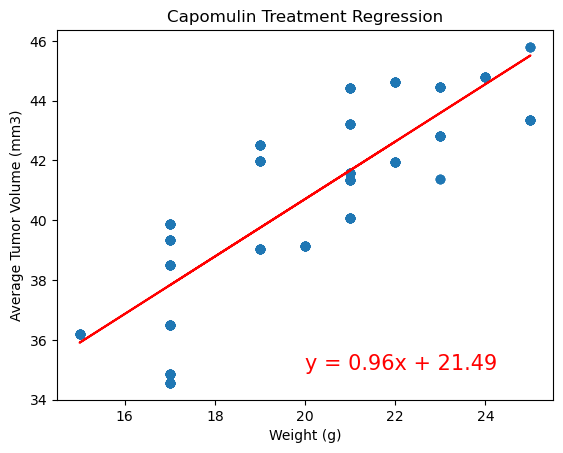

In [46]:
# linear regression model for Capomulin Treatment
x_value=weight_c
y_value=avt_c
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_value, y_value)
plt.scatter(x_value,y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_value,regress_values,"r-")
plt.annotate(line_eq,(20,35),fontsize=15,color="red")
plt.title("Capomulin Treatment Regression")
plt.xlabel('Weight (g)')
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()